<a href="https://colab.research.google.com/github/saumay3105/PBL-2/blob/main/COVIDSenti_C_27k.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [2]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [3]:
from google.colab import files
uploaded = files.upload()

Saving COVIDSenti-C.csv to COVIDSenti-C.csv


In [4]:
import random

random.seed(42)

twitter_data = pd.read_csv('COVIDSenti-C.csv')

n = 27000
skiprows = sorted(
    random.sample(range(1, twitter_data.shape[0] + 1),
                  twitter_data.shape[0] - n))

twitter_data = pd.read_csv('COVIDSenti-C.csv', skiprows=skiprows)

twitter_data.head()

,tweet,label
0,BREAKING: Kim Jong-un sends condolence letter ...,pos
1,Coronavirus: Cases rise in South Korea as Aust...,neu
2,"How dangerous is coronavirus really, when are ...",neu
3,@Dr_psychiatry Make a mark and also coronaviru...,neu
4,As #Coronavirus positive cases continues to ri...,neu


In [5]:
twitter_data.shape

(27000, 2)

In [6]:
twitter_data.isnull().sum()

,0
tweet,0
label,0


In [7]:
twitter_data.isnull().sum()

,0
tweet,0
label,0


In [8]:
twitter_data['label'].value_counts()

,count
label,
neu,19717
neg,5213
pos,2070


In [9]:
# 0-> neutral, 1-> positive 2-> negative
twitter_data['label'] = twitter_data['label'].replace({'neu': 0, 'pos': 1, 'neg': 2})

print(twitter_data['label'].value_counts())

label
0    19717
2     5213
1     2070
Name: count, dtype: int64


<ipython-input-9-e3ad959fbf97>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  twitter_data['label'] = twitter_data['label'].replace({'neu': 0, 'pos': 1, 'neg': 2})


In [10]:
port_stem = PorterStemmer()

In [11]:
def stemming(content):
  stemmed_content = re.sub('[^a-zA-Z]', ' ', content)
  stemmed_content = stemmed_content.lower()
  stemmed_content = stemmed_content.split()
  stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
  stemmed_content = ' '.join(stemmed_content)

  return stemmed_content

In [12]:
twitter_data['stemmed_content'] = twitter_data['tweet'].apply(stemming)
twitter_data.head()

,tweet,label,stemmed_content
0,BREAKING: Kim Jong-un sends condolence letter ...,1,break kim jong un send condol letter presid mo...
1,Coronavirus: Cases rise in South Korea as Aust...,0,coronaviru case rise south korea australia imp...
2,"How dangerous is coronavirus really, when are ...",0,danger coronaviru realli symptom like appear r...
3,@Dr_psychiatry Make a mark and also coronaviru...,0,dr psychiatri make mark also coronaviru proof
4,As #Coronavirus positive cases continues to ri...,0,coronaviru posit case continu rise anishaj bri...


In [13]:
X = twitter_data['stemmed_content'].values
Y = twitter_data['label'].values

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, stratify=Y, random_state=2)

In [15]:
print(X.shape, X_train.shape, X_test.shape)

(27000,) (21600,) (5400,)


In [16]:
vectorizer = TfidfVectorizer()
vectorizer.fit(X_train)

X_train = vectorizer.transform(X_train)
X_test = vectorizer.transform(X_test)

In [17]:
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
model.fit(X_train, Y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=1000, multi_class='multinomial')

In [18]:
predictions = model.predict(X_test)
print(accuracy_score(Y_test, predictions))

0.8277777777777777


In [19]:
predictions_train = model.predict(X_train)
print(accuracy_score(Y_train, predictions_train))

0.8766203703703703


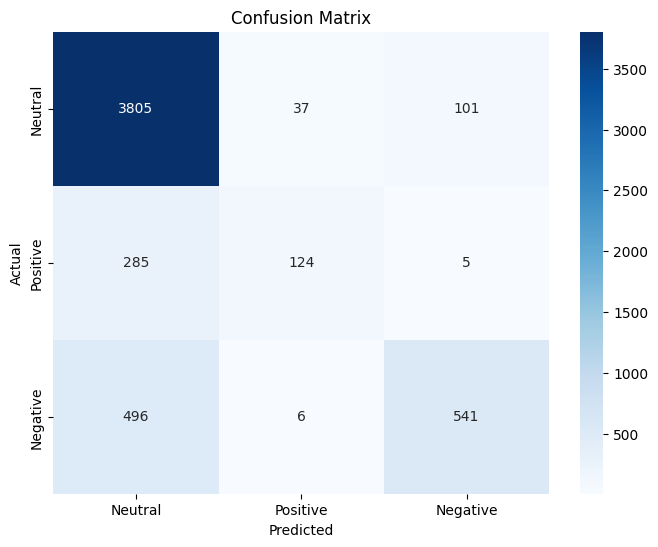

In [20]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(Y_test, predictions)

# Plotting the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Neutral', 'Positive', 'Negative'],
            yticklabels=['Neutral', 'Positive', 'Negative'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [21]:

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),  # Input layer
    layers.Dense(64, activation='relu'),  # Hidden layer
    layers.Dense(3, activation='softmax')  # Output layer with softmax for multi-class
])


model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # Use sparse_categorical_crossentropy for integer labels
              metrics=['accuracy'])

# Train the model
model.fit(X_train, Y_train, epochs=10, batch_size=32, validation_split=0.1)  # Adjust epochs and batch_size as needed

# Evaluate the model
loss, accuracy = model.evaluate(X_test, Y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")


# Make predictions
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1) # Get the class with highest probability

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
608/608 ━━━━━━━━━━━━━━━━━━━━ 46s 73ms/step - accuracy: 0.7482 - loss: 0.7035 - val_accuracy: 0.8421 - val_loss: 0.4387
Epoch 2/10
608/608 ━━━━━━━━━━━━━━━━━━━━ 46s 76ms/step - accuracy: 0.9385 - loss: 0.1800 - val_accuracy: 0.8338 - val_loss: 0.5220
Epoch 3/10
608/608 ━━━━━━━━━━━━━━━━━━━━ 83s 78ms/step - accuracy: 0.9870 - loss: 0.0474 - val_accuracy: 0.8185 - val_loss: 0.6654
Epoch 4/10
608/608 ━━━━━━━━━━━━━━━━━━━━ 81s 77ms/step - accuracy: 0.9968 - loss: 0.0143 - val_accuracy: 0.8208 - val_loss: 0.7879
Epoch 5/10
608/608 ━━━━━━━━━━━━━━━━━━━━ 83s 78ms/step - accuracy: 0.9987 - loss: 0.0055 - val_accuracy: 0.8134 - val_loss: 0.8854
Epoch 6/10
608/608 ━━━━━━━━━━━━━━━━━━━━ 80s 76ms/step - accuracy: 0.9993 - loss: 0.0028 - val_accuracy: 0.8120 - val_loss: 0.9543
Epoch 7/10
608/608 ━━━━━━━━━━━━━━━━━━━━ 49s 81ms/step - accuracy: 0.9996 - loss: 0.0012 - val_accuracy: 0.8079 - val_loss: 1.0365
Epoch 8/10
608/608 ━━━━━━━━━━━━━━━━━━━━ 81s 79ms/step - accuracy: 0.9998 - loss: 6.5008e-0

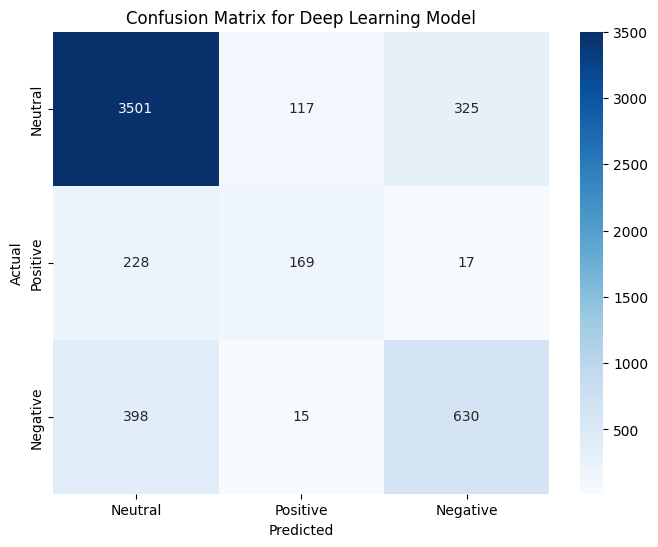

In [22]:
cm = confusion_matrix(Y_test, predicted_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Neutral', 'Positive', 'Negative'],
            yticklabels=['Neutral', 'Positive', 'Negative'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Deep Learning Model')
plt.show()

SVM Accuracy: 0.8527777777777777


Text(0.5, 1.0, 'Confusion Matrix for SVM Model')

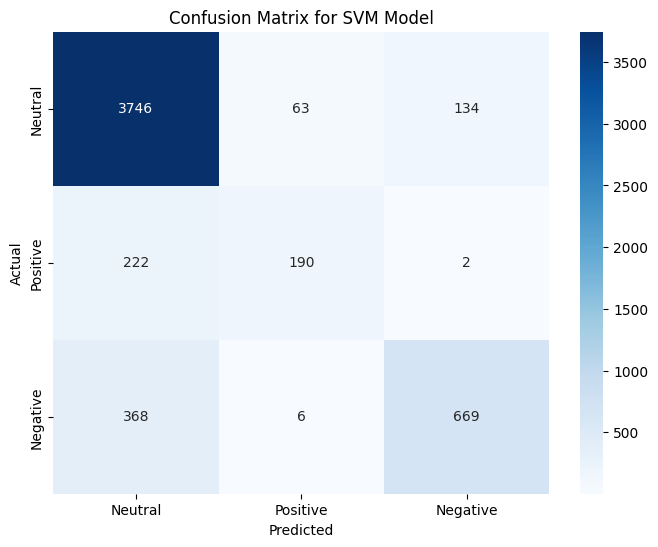

In [23]:
from sklearn.svm import SVC

svm_model = SVC(kernel='linear', C=1)
svm_model.fit(X_train, Y_train)
svm_predictions = svm_model.predict(X_test)
svm_accuracy = accuracy_score(Y_test, svm_predictions)
print(f"SVM Accuracy: {svm_accuracy}")
svm_cm = confusion_matrix(Y_test, svm_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(svm_cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Neutral', 'Positive', 'Negative'],
            yticklabels=['Neutral', 'Positive', 'Negative'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for SVM Model')

Using lemmatization instead of Stemming


In [24]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [26]:
from nltk.stem import WordNetLemmatizer

In [27]:
lemmatizer = WordNetLemmatizer()

In [29]:
def lemmatization(content):
    lemmatized_content = re.sub('[^a-zA-Z]', ' ', content)
    lemmatized_content = lemmatized_content.lower()
    lemmatized_content = lemmatized_content.split()
    lemmatized_content = [lemmatizer.lemmatize(word) for word in lemmatized_content if not word in stopwords.words('english')]
    lemmatized_content = ' '.join(lemmatized_content)
    return lemmatized_content

In [30]:
twitter_data['lemmed_content'] = twitter_data['tweet'].apply(lemmatization)
twitter_data.head()

,tweet,label,stemmed_content,lemmed_content
0,BREAKING: Kim Jong-un sends condolence letter ...,1,break kim jong un send condol letter presid mo...,breaking kim jong un sends condolence letter p...
1,Coronavirus: Cases rise in South Korea as Aust...,0,coronaviru case rise south korea australia imp...,coronavirus case rise south korea australia im...
2,"How dangerous is coronavirus really, when are ...",0,danger coronaviru realli symptom like appear r...,dangerous coronavirus really symptom likely ap...
3,@Dr_psychiatry Make a mark and also coronaviru...,0,dr psychiatri make mark also coronaviru proof,dr psychiatry make mark also coronavirus proof
4,As #Coronavirus positive cases continues to ri...,0,coronaviru posit case continu rise anishaj bri...,coronavirus positive case continues rise anish...


In [31]:
X_lem = twitter_data['lemmed_content'].values
Y_lem = twitter_data['label'].values

In [32]:
X_train_lem, X_test_lem, Y_train_lem, Y_test_lem = train_test_split(X_lem,Y_lem, test_size=0.2, stratify=Y, random_state=2)

In [33]:
vectorizer = TfidfVectorizer()
vectorizer.fit(X_train_lem)

X_train_lem = vectorizer.transform(X_train_lem)
X_test_lem = vectorizer.transform(X_test_lem)

In [34]:
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
model.fit(X_train_lem, Y_train_lem)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=1000, multi_class='multinomial')

In [35]:
predictions_lem = model.predict(X_test_lem)
print(accuracy_score(Y_test_lem, predictions_lem))


0.8283333333333334


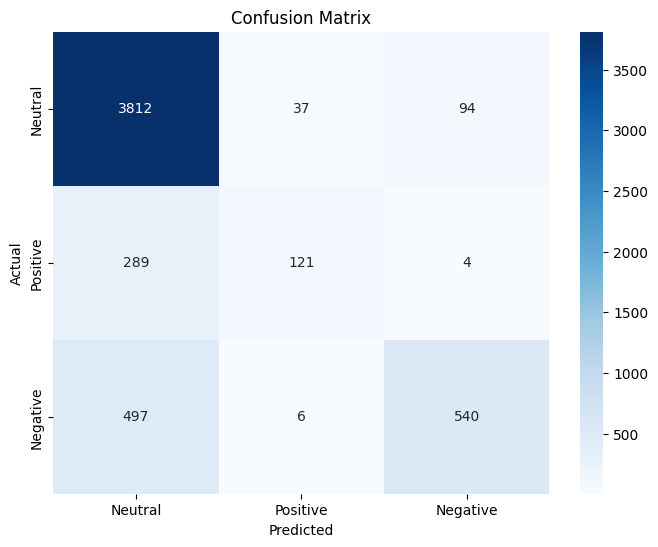

In [36]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(Y_test_lem, predictions_lem)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Neutral', 'Positive', 'Negative'],
            yticklabels=['Neutral', 'Positive', 'Negative'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()